In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(x))

class perceptron():
    def __init__(self,N_perceptrons):
        self.N_perceptrons=N_perceptrons
    def data(self,L_inputs,N_inputs,inputs,inputs_result):
        #It is expected an input as array
        # The output should be binary 0 or 1
        
        if self.N_perceptrons!=1:
            aux_1=np.array(inputs_result)
        else:
            aux_1=np.zeros(N_inputs+1)
            aux_1[0:N_inputs]=inputs_result
        inputs_result=aux_1
        self.inputs=np.array(inputs)
        self.results=inputs_result
        self.N_inputs=N_inputs
        self.L_inputs=L_inputs
        
    def trainning(self,N_trainning):
        inputs=self.inputs
        IN_results=self.results
        N_perceptrons=self.N_perceptrons
        L_inputs=self.L_inputs
        N_inputs=self.N_inputs
        weights=np.random.uniform(size=(N_perceptrons,L_inputs))
        erro=[0]*(N_trainning*N_perceptrons)
        if N_inputs!=1 and N_perceptrons==1:
            counter=0
            while(counter<N_trainning):
                    I=counter%N_inputs
                    aux_1=sigmoid(np.dot(inputs[I,:],weights[0,:]))
                    erro[counter]=0.5*(aux_1-IN_results[I])**2
                    update=aux_1*(1-aux_1)*(IN_results[I]-aux_1)*inputs[I,:]
                    weights[0,:]=weights[0,:]-update
                    counter+=1
            print('erro ---> ',erro[-1],'\n iteration number --> ',counter)
            plt.plot(np.arange(N_trainning),erro)
                    
        elif N_inputs==1 and N_perceptrons==1:
            for u in range(N_trainning):
                aux_1=sigmoid(np.dot(inputs,weights[0,:]))
                erro[u]=0.5*(aux_1-IN_results[0])**2
                update=aux_1*(1-aux_1)*(IN_results[0]-aux_1)*inputs
                weights[0,:]=weights[0,:]-update
            print('erro ---> ',erro[-1],'\niteration number --> ',u)
            plt.plot(np.arange(N_trainning),erro)
        elif N_perceptrons!=1:
            counter=0
            while(counter<N_trainning*N_perceptrons):
                for u in range(N_inputs):
                    for i in range(N_perceptrons):
                        aux_1=sigmoid(np.dot(inputs[u],weights[i,:]))
                        update=aux_1*(1-aux_1)*(IN_results[u,i]-aux_1)*inputs[u]
                        weights[i,:]-=update
                        erro[counter]=0.5*(aux_1-IN_results[u,i])**2
                        counter+=1
            for o in range(N_perceptrons):
                plt.plot(np.arange(N_trainning),erro[o::N_perceptrons],label='NEURON '+str(o))
            print('erro ---> ',erro[-N_perceptrons:-1],'\niteration number --> ',counter)
        plt.legend()
        plt.ylabel('ERRO')
        plt.xlabel('ITERATION')
        plt.title('NEURAL NETWORK \n {} PERCEPTRON'.format(N_perceptrons))
        plt.show()       
        self.weights=weights 
        print(weights)
        return erro[-(N_perceptrons):]
        
    def run_NN_1P(self,INPUT):
        weights=self.weights
        INPUT=np.array(INPUT)
        aux_1=sigmoid(np.dot(weights[0,:],INPUT))
        return aux_1
    
    def run_NN(self,INPUT):
        weights=self.weights
        N_perceptrons=self.N_perceptrons
        INPUT=np.array(INPUT)
        aux_1=np.zeros(N_perceptrons)
        for i in range(N_perceptrons):
            aux_1[i]=sigmoid(np.dot(weights[i,:],INPUT))
        return aux_1
        
        
            
   
            
        


erro --->  [0.005297218270963009, 0.0021748647576630064, 1.4352734963521557e-05] 
iteration number -->  4000


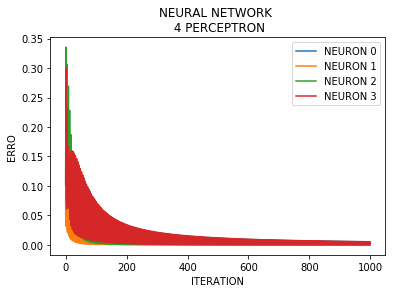

[[-6.67567386  2.17459652  2.15420667]
 [ 2.17031294 -2.6546557   3.57673625]
 [-0.27337539 -5.22386783  2.89877142]
 [-6.66248072  2.17022882  2.14961946]]


In [2]:
#IF the first elemente is 0, then the first output is 0, 
#IF the third element is 0, then the second output is 1
#IF the second element is 1, then the third output is 1
#if the sum of the elements >=2, then the fourth output is 1, Otherwise 0
DATA_2=[[0,0,1],[1,1,1],[1,0,1],[0,1,0]]
RESULTS_2=[[0,0,0,0],[1,0,1,1],[1,0,0,1],[0,1,1,0]]
teste=perceptron(4)
teste.data(3,4,DATA_2,RESULTS_2)
erro=teste.trainning(1000)

In [3]:
import pandas as pd
data=pd.read_csv("pseudo_data_square.csv",sep="\t", header=None)
data.columns=['x','y','results']
DATA_1=np.array(data.x)
DATA_2=np.array(data.y)
RESULTS=np.array(data.results)
END=int(len(DATA_1)*0.6)
DATA_train=np.vstack((DATA_1[:END], DATA_2[:END])).T
RESULTS_train=RESULTS[:END]
DATA_check=np.vstack((DATA_1[END:], DATA_2[END:])).T
RESULTS_check=RESULTS[END:]
RESULTS_NN=np.zeros(len(RESULTS[END:]))

No handles with labels found to put in legend.


erro --->  0.11355358486028962 
 iteration number -->  10000


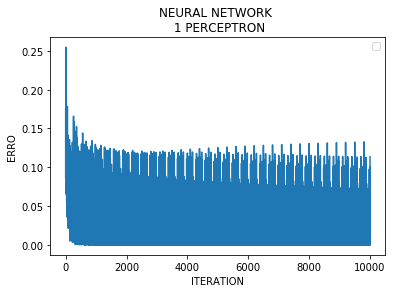

[[ 13.24308734 -13.084537  ]]
[0.11355358486028962]


In [ ]:
EXP_1=perceptron(1)
EXP_1.data(2,END,DATA_train,RESULTS_train)
erro=EXP_1.trainning(10000)
print(erro)

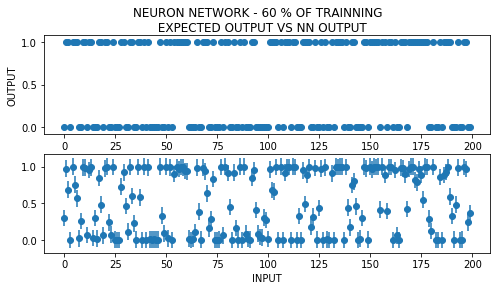

In [ ]:
for i in range(len(DATA_check)):
    RESULTS_NN[i]=EXP_1.run_NN_1P(DATA_check[i])
    
fig, axs = plt.subplots(2,figsize=(8,4))
plt.suptitle('NEURON NETWORK - 60 % OF TRAINNING \n EXPECTED OUTPUT VS NN OUTPUT')

x1=np.arange(len(RESULTS_NN))

axs[1].errorbar(x1,RESULTS_NN,yerr=erro[0], fmt='o',label="CORRECT OUTUPTS")
axs[0].scatter(x1,RESULTS_check,label="NN OUTUPTS")
axs[1].set_xlabel('INPUT')
axs[0].set_ylabel('OUTPUT')
#plt.tight_layout()
plt.show()

ERRO=np.fabs(RESULTS_check-RESULTS_NN)
plt.hist(ERRO,bins=30)
plt.title("DISTRIBUITION \nOF\n THE DIFERENCE BETWEEN NN OUTPUT AND THE EXACT VALUES ")
plt.ylabel('FREQUENCY')
plt.xlabel('ERRO')
plt.style.use('seaborn-dark-palette')
plt.show()

X2=np.array([(ERRO<erro[0]).sum(),(ERRO>erro[0]).sum()])
Label=['CORRECT','INCORRECT']
plt.bar(np.arange(len(X2)),X2,color='orange')
plt.title('RESULTS \nINSIDE THE ERROR')
plt.xticks(np.arange(len(Label)),labels=Label)
plt.style.use('seaborn-dark-palette')
plt.show()
